# Inference

Testing the inference API

In [12]:
from glob import glob
import random
import rasterio as rio
import numpy as np
import requests
import matplotlib.pyplot as plt

In [4]:
images = glob('data/*_TOA.tif')

In [6]:
sample = random.choice(images)
sample

'data/20220904_135040_SN16_21S_301927_6172630_TOA.tif'

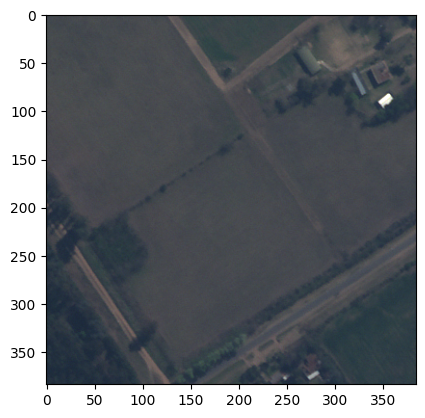

In [10]:
ds = rio.open(sample)
rgb = (ds.read([1, 2, 3]) / 4000).clip(0, 1)
plt.imshow(rgb.transpose(1, 2, 0))
plt.show()

In [26]:
url = 'http://localhost:8001/classification.onnx'

res = requests.post(url, files={'image': open(sample, 'rb')})
if res.status_code != 200:
	print(res.json())

outputs = res.json()
outputs

[[0.001087784767150879,
  0.9381685256958008,
  0.003251105546951294,
  0.0003883838653564453,
  0.015796780586242676,
  0.013009309768676758]]

In [ ]:
url = 'http://localhost:8001/segmentation.onnx'

res = requests.post(url, files={'image': open(sample, 'rb')})
if res.status_code != 200:
	print(res.json())

outputs = res.json()
outputs